Predict Heart Disease with Classification Machine Learning Algorithms


In [1]:
# Import necessary libraries
# Read data
import numpy as np               # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd              # manipulate data, data processing, load csv file I/O (e.g., pd.read_csv)

#Visualization         
import seaborn as sns            # Visualization using seaborn
import matplotlib.pyplot as plt  # Visualization using matplotlib
%matplotlib inline

In [2]:
# Data wrangling
filepath = 'C:/GitHub/ai-machine-learning/data/heartDisease.csv'
data = pd.read_csv(filepath)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print("(Rows, columns): " + str(data.shape))
data.columns

(Rows, columns): (303, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
data.describe() #summarizes the count, mean, standard deviation, min, and max for numerica variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.nunique(axis=0) # returns the number of unique values for each variable

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
data.isna().sum() # Display the missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data['target'].value_counts() # check the proportion of positive to negative results in target

target
1    165
0    138
Name: count, dtype: int64

<Axes: >

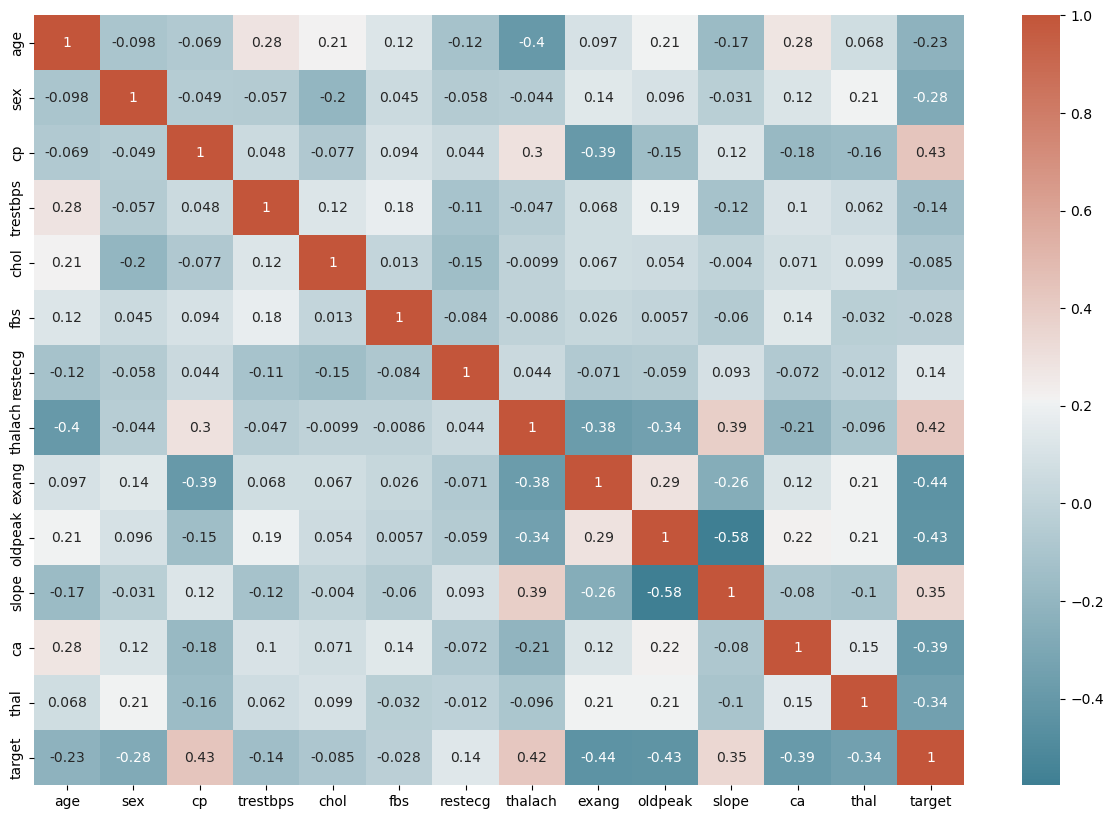

In [13]:
# Data Analysis
# Correlations
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

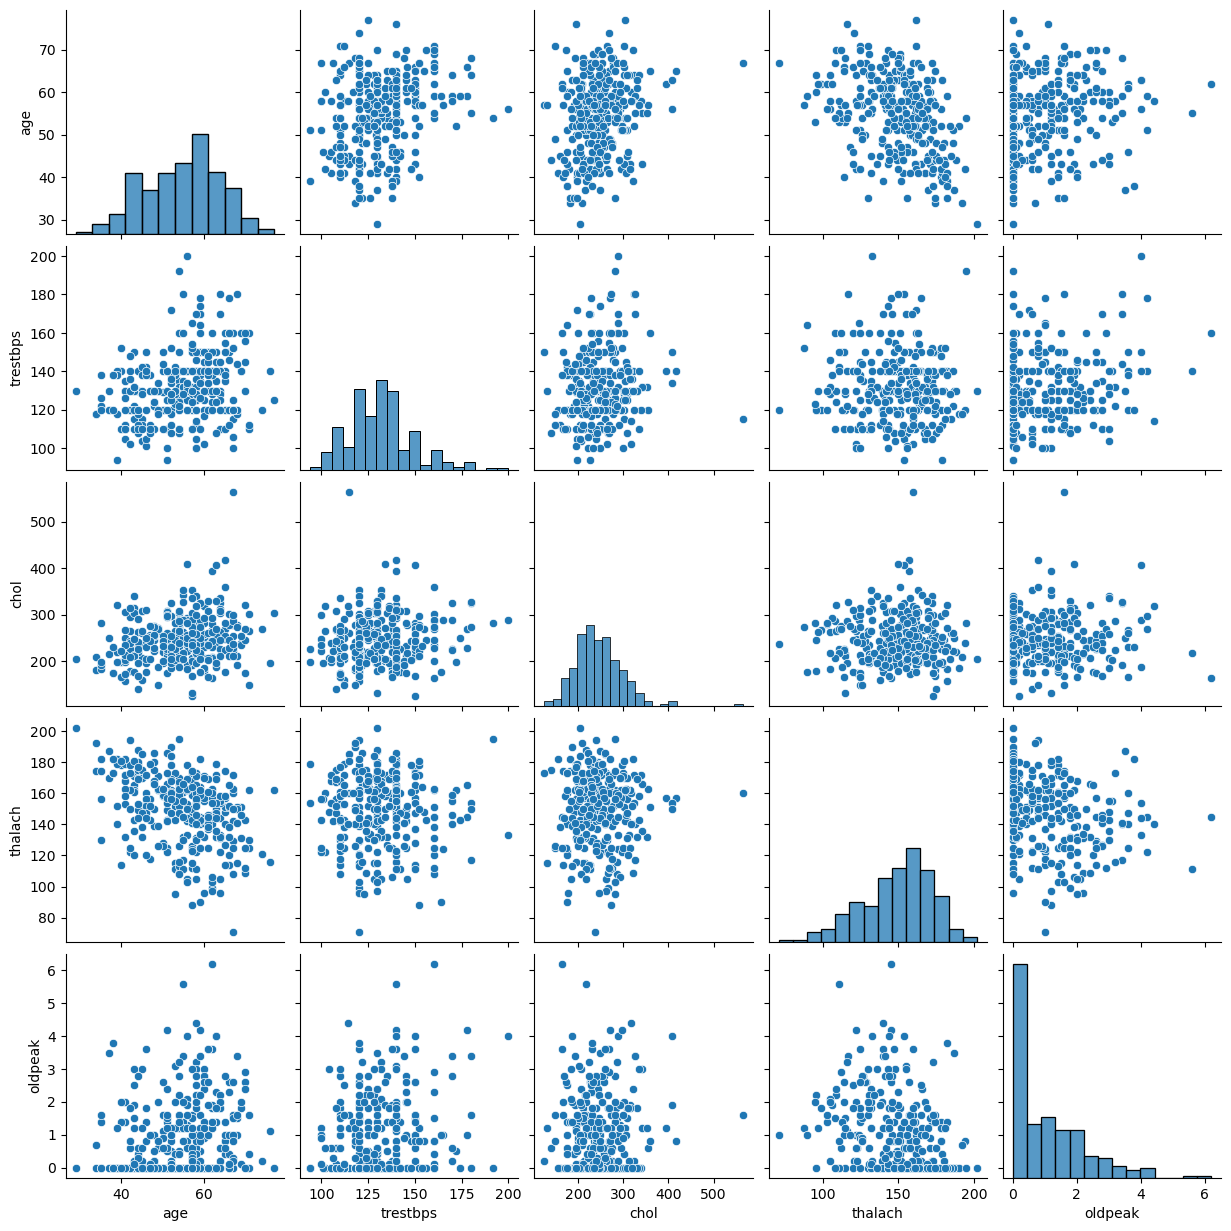

In [14]:
# We can see ther eis a positive correlation between chest poin (cp) & target (our predictor)
# This makes sense since the greater amount of chest pain results in a greater chance of having a heard disease
# We also see a negative correlation between exercise induced angina (exang) & target
# This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow
subdata = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
sns.pairplot(subdata)

Text(36.818927083333335, 0.5, 'ST depression')

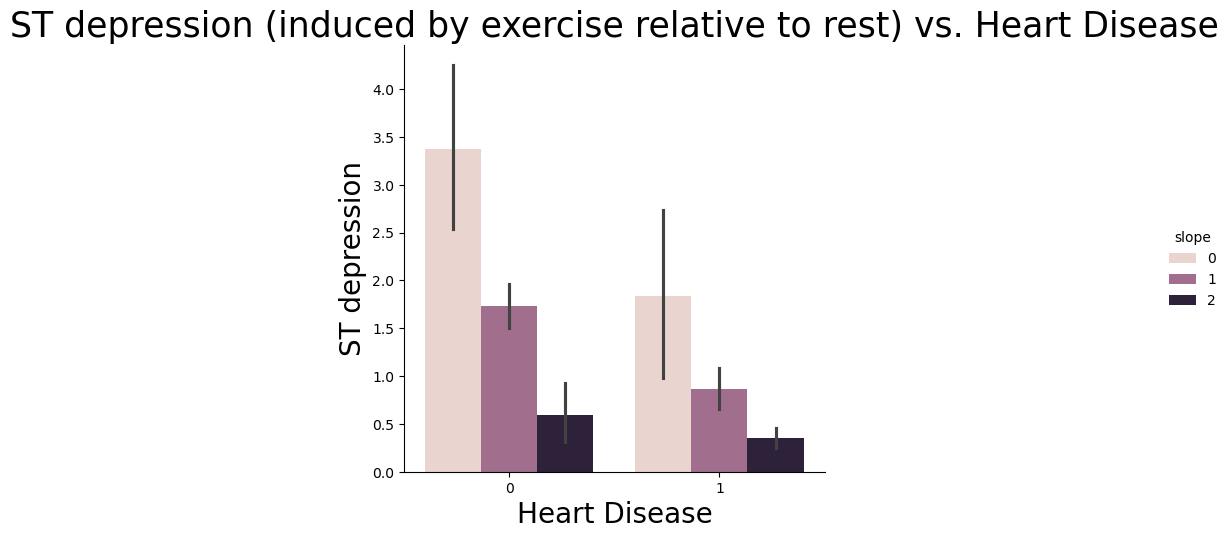

In [15]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data)
plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease', size=20)
plt.ylabel('ST depression', size=20)

Text(0, 0.5, 'Thalach Level')

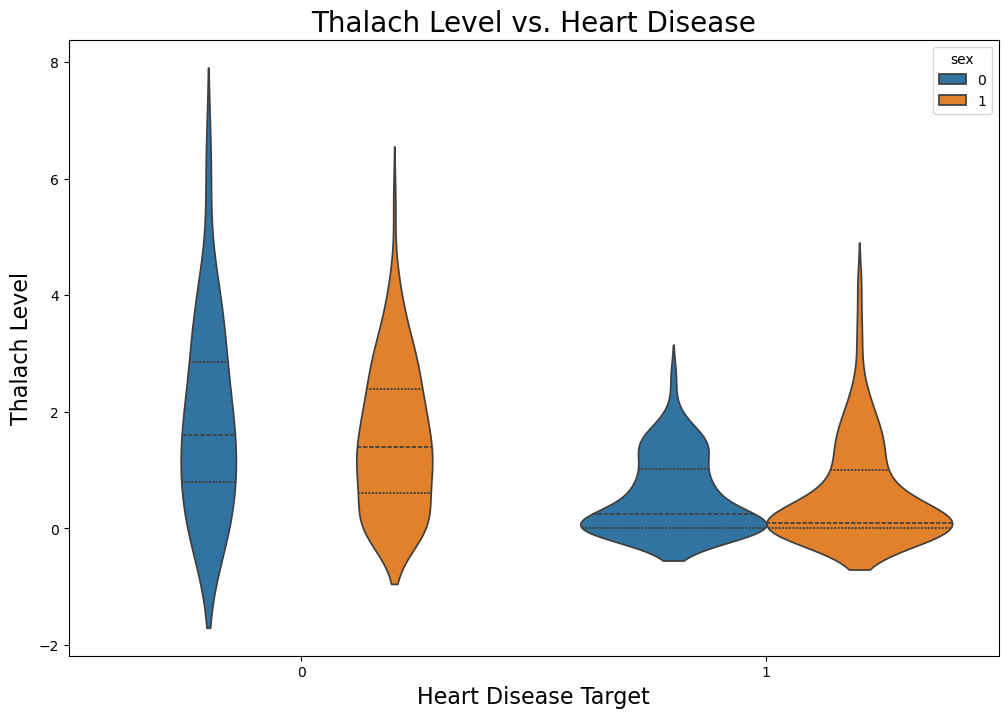

In [16]:
# ST segment depression occurs because when the ventricle is at rest and therefore repolarized. 
# If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease.
# This supports the plot above because low ST Depression yields people at greater risk for heart disease.
# While a high ST depression is considered normal & healthy.
# Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

#Violin and Box plots
# The advantages of showing the Box & Violin plots is that it showsthe basic statistics of the data, as well as its distribution.
# It shows the median, IQR, & Tukey’s fence. (minimum, first quartile (Q1), median, third quartile (Q3), and maximum).
# In addition it can provide us with outliers in our data.
plt.figure(figsize=(12, 8))
sns.violinplot(x='target', y='oldpeak', hue='sex', inner='quartile', data=data)
plt.title("Thalach Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

We can see that the overall shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we dont see many differences between male & female target outcomes.

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

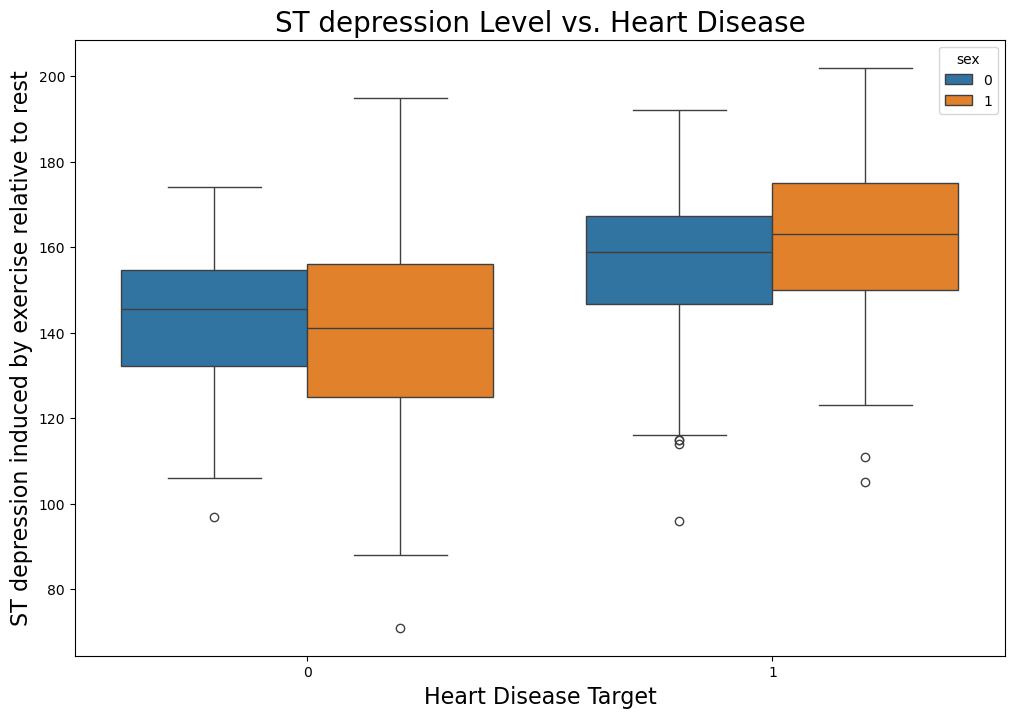

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='target', y='thalach', hue='sex', data=data)
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

Positive patients exhibit a hightened median for ST depression level, while negative patients have lower levels. In addition, we dont see many differences between male & female target outcomes, expect for the fact that males have slightly larger ranges of ST Depression.

Filtering data by positive & negative Heart Disease patient

In [18]:
# Filtering data by positive Heart Disease patient
pos_data = data[data['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


Filtering data by negative Heart Disease patient

In [19]:
# Filtering data by Negative Heart Disease patient
neg_data = data[data['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [20]:
print("(Positive Patients ST depression): ", str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): ", str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression):  0.583030303030303
(Negative Patients ST depression):  1.5855072463768116


In [21]:
print("(Positive Patients thalach): ", str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): ", str(neg_data['thalach'].mean()))

(Positive Patients thalach):  158.46666666666667
(Negative Patients thalach):  139.1014492753623


From comparing positive and negative patients we can see there are vast differenes in means for many of our Features. From examing the details, we can observe that positive patients experience heightened maximum heart rate achieved (thalach) average. In addition, positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak).

4. Machine Learning + Predictive Analytics

Prepare Data for Modeling

In [22]:
# Assign the 13 features to X, & the last column to our classification predictor, y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Split: the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Create a StandardScaler object
x_train = sc.fit_transform(x_train) # Fit and transform the training data
x_test = sc.transform(x_test) # Transform the test data using the same scaler

Standardization is a crucial step to ensure that the features are on a similar scale, which can improve the performance of many machine learning algorithms, particularly those that rely on distance measures or gradient-based optimization.

Modeling /Training

We will now Train various Classification Models on the Training set & see which yields the highest accuracy. We will compare the accuracy of Logistic Regression, K-NN, SVM, Naives Bayes Classifier, Decision Trees, Random Forest, and XGBoost. Note: these are all supervised learning models.

Model 1: Logistic Regression

In [26]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) #Train/Fit model
y_pred1 = model1.predict(x_test) #get y predictions
print(classification_report(y_test, y_pred1)) #output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



Creating Logistic Regression Model:
An instance of the LogisticRegression model is created with random_state=1. The random_state parameter is set for reproducibility, ensuring that the results are consistent across different runs.

Training/Fitting the Model:
The model is trained (fitted) using the training data (x_train and y_train) with the fit method. This step involves learning the relationships between the features (x_train) and the target variable (y_train).

Making Predictions on Test Data:
The trained model is then used to make predictions on the test data (x_test) with the predict method. The predicted labels are stored in the variable y_pred1.

Printing the Classification Report:
The classification report is printed using the classification_report function. This report provides various metrics such as precision, recall, f1-score, and support for both classes (usually binary classes in this case). The classification report is a useful tool for evaluating the performance of a classification model, especially in cases where class imbalance might be present.

Model 2: K-NN (K-Nearest Neighbors)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier model
model2 = KNeighborsClassifier()

# Train or Fit the model using the training data
model2.fit(x_train, y_train)

# Get predictions on the test data
y_pred2 = model2.predict(x_test)

# Print the classification report which includes precision, recall, f1-score and support
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Creating K-Nearest Neighbors Model:

An instance of the KNeighborsClassifier model is created. This model is a type of instance-based learning algorithm for classification where predictions are made based on the majority class of the k-nearest neighbors in the feature space.

Model 3: SVM (Support Vector Machine)

Creating Support Vector Machine Model:
An instance of the SVC model is created. This model is a Support Vector Machine classifier, and by default, it uses an RBF kernel. The random_state=1 parameter is set for reproducibility.

In [29]:
from sklearn.svm import SVC

# Create an instance of the Support Vector Machine (SVM) classifier
model3 = SVC(random_state=1)

# Train/Fit the model using the training data (x_train and y_train)
model3.fit(x_train, y_train)

# Get predictions on the test data
y_pred3 = model3.predict(x_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Model 4: Naives Bayes Classifier

Creating Gaussian Naive Bayes Model:
An instance of the GaussianNB model is created. This model is based on the Gaussian Naive Bayes algorithm, which assumes that the features are normally distributed within each class.

In [30]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes classifier
model4 = GaussianNB()

# Train/Fit the model using the training data (x_train and y_train)
model4.fit(x_train, y_train)

# Get predictions on the test data
y_pred4 = model4.predict(x_test)

# Print the classification report, which includes precision, recall, f1-score, and support
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Model 5: Decision Trees

Creating Decision Tree Model:

An instance of the DecisionTreeClassifier model is created. Decision trees make decisions by recursively splitting the data based on the most significant feature at each node.

In [31]:
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



Model 6: Random Forest

The RandomForestClassifier is a machine learning model implemented in scikit-learn that belongs to the family of ensemble methods. It is an extension of the decision tree algorithm and is used for classification tasks. Ensemble methods combine the predictions from multiple models to improve overall performance and robustness. 

In [32]:
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



Model 7: XGBoost

The XGBClassifier is a machine learning model implemented in the XGBoost library, which stands for eXtreme Gradient Boosting. XGBoost is an efficient and scalable implementation of gradient boosting algorithms. The XGBClassifier is specifically designed for classification tasks. 
XGBoost is a gradient boosting framework that builds a strong predictive model by combining the predictions of multiple weak models (typically decision trees).

In [35]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
model7 = XGBClassifier(random_state=1)

# Train/Fit the model using the training data (x_train and y_train)
model7.fit(x_train, y_train)

# Get predictions on the test data
y_pred7 = model7.predict(x_test)

print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.73      0.77      0.75        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



From comparing the 7 models, we can conclude that Model 6: Random Forest yields the highest accuracy. With an accuracy of 80%.

Making the Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming y_pred6 contains the predicted labels and y_test contains the true labels
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]


0.8032786885245902

21 is the amount of True Positives in our data, while 28 is the amount of True Negatives.

9 & 3 are the number of errors.

There are 9 type 1 error (False Positives)- You predicted positive and it’s false.

There are 3 type 2 error (False Negatives)- You predicted negative and it’s false.

Hence if we calculate the accuracy its # Correct Predicted/ # Total. In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.

(TP + TN)/(TP + TN + FP + FN). (21+28)/(21+28+9+3) = 0.80 = 80% accuracy

Note: A good rule of thumb is that any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

Feature Importance

Feature Importance provides a score that indicates how helpful each feature was in our model.
The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.

In [38]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


<Axes: >

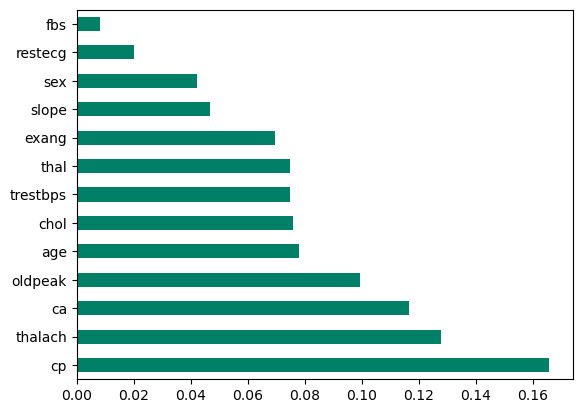

In [39]:
index = data.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='summer')

From the Feature Importance graph above, we can conclude that the top 4 significant features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).

In [40]:
importance

age         0.078135
sex         0.042061
cp          0.165800
trestbps    0.074767
chol        0.075866
fbs         0.008276
restecg     0.020139
thalach     0.127722
exang       0.069496
oldpeak     0.099566
slope       0.046774
ca          0.116669
thal        0.074728
dtype: float64

Predictions

Scenario: A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm.

He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.

In addition he has a serum cholestoral of 230 mg/dl.

He is fasting blood sugar > 120 mg/dl.

He has a resting electrocardiographic result of 1.

The patients maximum heart rate achieved is 140.

Also, he was exercise induced angina.

His ST depression induced by exercise relative to rest value was 2.2.

The slope of the peak exercise ST segment is flat.

He has no major vessels colored by fluoroscopy, and in addition his maximum heart rate achieved is a reversable defect.

Based on this information, can you classify this patient with Heart Disease?

In [42]:
p_test = sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])

In [43]:
p_test

array([[-3.77323281,  0.6636838 ,  0.99843017, -1.23061845, -0.31850248,
         2.39211668,  0.88510589, -0.40511057,  1.46385011,  1.07378405,
         0.96628239, -0.72428597, -0.47497213]])

In [44]:
print(model6.predict(p_test))

[1]


Yes! Our machine learning algorithm has classified this patient with Heart Disease. Now we can properly diagnose him, & get him the help he needs to recover. By diagnosing him early, we may prevent worse symtoms from arising later.

In [45]:
y_pred = model6.predict(x_test)

In [46]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [47]:
x_test

array([[ 0.82357149, -1.50674161, -0.95800789,  1.64732574, -1.60248069,
        -0.41803981, -1.02735505, -0.19244949, -0.68313005,  4.72344331,
        -2.30421185,  2.26339365,  1.16707438],
       [ 0.16688516,  0.6636838 ,  0.02021114, -0.07944077, -0.49359042,
        -0.41803981, -1.02735505,  0.5731304 , -0.68313005, -0.93352855,
         0.96628239, -0.72428597,  1.16707438],
       [-0.70869661,  0.6636838 , -0.95800789, -0.07944077,  0.18730711,
         2.39211668, -1.02735505,  0.02021159,  1.46385011, -0.93352855,
         0.96628239,  1.26750044,  1.16707438],
       [ 0.60467605,  0.6636838 , -0.95800789, -0.07944077, -0.78540365,
        -0.41803981, -1.02735505, -0.7453683 ,  1.46385011,  1.25626701,
        -0.66896473,  1.26750044,  1.16707438],
       [-0.48980117,  0.6636838 , -0.95800789,  1.0717369 , -0.06559768,
        -0.41803981, -1.02735505, -0.91549716, -0.68313005,  1.43874997,
        -0.66896473, -0.72428597,  1.16707438],
       [ 0.93301921,  0.663683

In [48]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

create a new array by concatenating the predicted labels (y_pred) and true labels (y_test) horizontally. The resulting array has two columns, where the first column corresponds to the predicted labels, and the second column corresponds to the true labels. This can be useful for comparing the model's predictions with the actual labels for further analysis or evaluation.

In [49]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


Conclusions
Our Random Forest algorithm yields the highest accuracy, 80%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).

Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symtoms from arising later.